[Networkx Documentation](https://networkx.org/documentation/)  
[About draw_networkx()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

## 1. 네트워크 구성요소

### 1.1 기본정의

노드라는 구성요소와 링크라는 노드 쌍 사이의 연결들의 집합  
링크가 있으면 인접하거나 연결되어 있다고 말하며, 연결된 노드들은 이웃이라고 부름  

**간단한 용어**

- 네트워크 = 그래프
- 노드 = node = vertex = 꼭짓점
- 링크 = edge =엣지

네트워크 G의 요소
- N개의 노드 (꼭짓점)
- L개의 노드 쌍 (링크, 엣지)

**링크(i, j)**: 노드 i와 j를 연결  
**링크(i, j, w)**: 노드 i와 j를 연결, 가중치 w를 가짐

유향그래프(digraph): 방향성 네트워크
- 방향성 링크(directed link)를 사용함. 노드 순서가 방향을 반영함

## 무방향 그래프 그리기

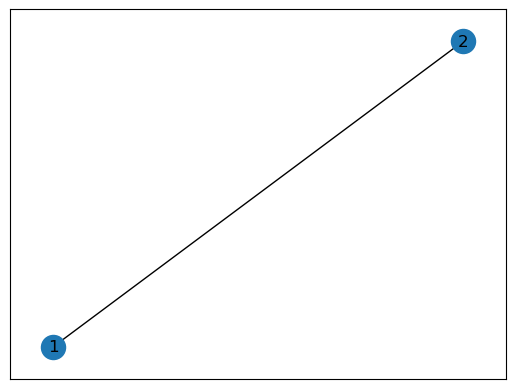

In [3]:
import networkx as nx

G = nx.Graph()

# 노드 이름으로 그래프 노드 추가
G.add_node(1)
G.add_node(2)

# 그래프 엣지(간선,링크) 추가
G.add_edge(1,2)

#그래프 그리기
nx.draw_networkx(G)

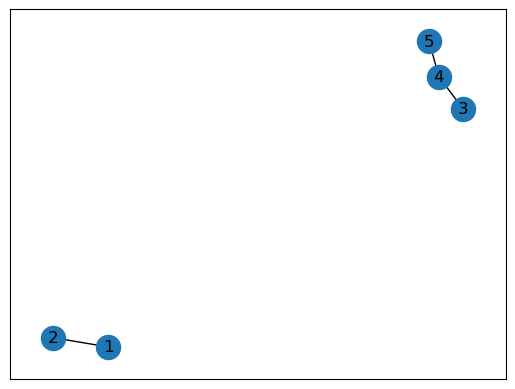

In [5]:
# 한 번에 여러개 추가하기
G.add_nodes_from([3, 4, 5])
G.add_edges_from([(3,4), (4,5)])

nx.draw_networkx(G)

In [9]:
# 모든 노드와 링크 확인하기
print(*G.nodes)
print(*G.edges)

1 2 3 4 5
(1, 2) (3, 4) (4, 5)


## 방향 그래프 그리기

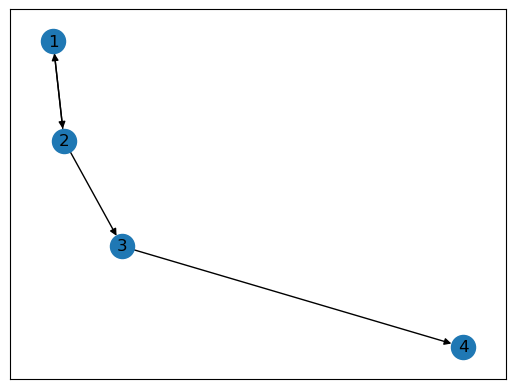

In [10]:
D = nx.DiGraph()

# 링크만 입력해도 자동으로 노드가 추가됨
D.add_edges_from([(1, 2), (2, 1)])
D.add_edges_from([(2, 3), (3, 4)])

nx.draw_networkx(D)

In [14]:
print('노드의 개수:', D.number_of_nodes())
print('엣지의 개수:', D.number_of_edges())
print('2와 이웃한 노드:', list(D.neighbors(2)))
print('2에서 나가는 노드:', list(D.predecessors(2)))
print('2로 들어오는 노드:', list(D.successors(2)))

노드의 개수: 4
엣지의 개수: 4
2와 이웃한 노드: [1, 3]
2에서 나가는 노드: [1]
2로 들어오는 노드: [1, 3]


## 완전 이분 네트워크

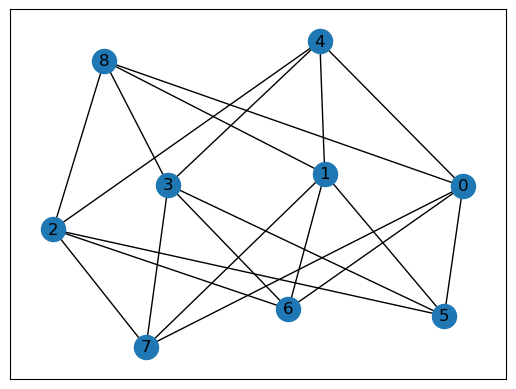

In [15]:
B = nx.complete_bipartite_graph(4, 5)
nx.draw_networkx(B)

## 순환 경로

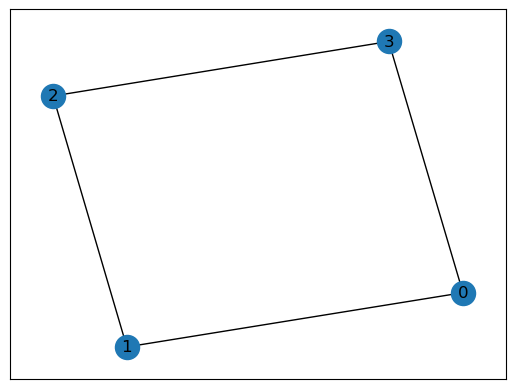

In [16]:
C = nx.cycle_graph(4)
nx.draw_networkx(C)

## 경로

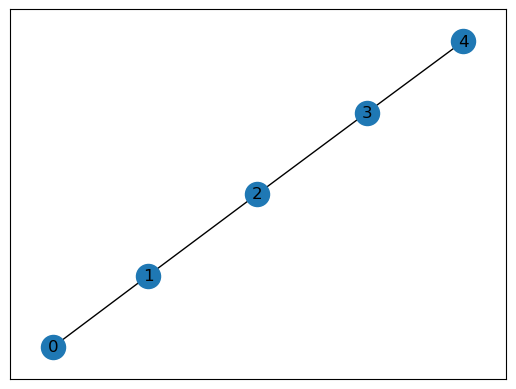

In [17]:
P = nx.path_graph(5)
nx.draw_networkx(P)

## 스타

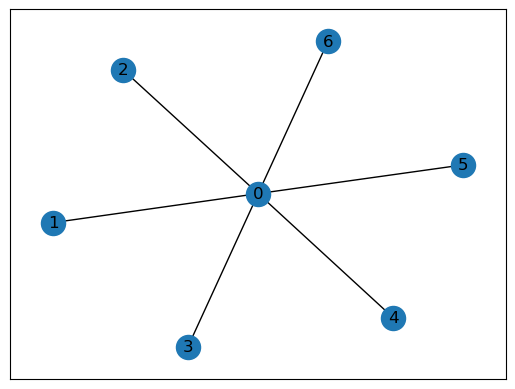

In [18]:
S = nx.star_graph(6)
nx.draw_networkx(S)

## 1.3 조밀도와 성김도

**조밀도(density)**  
실제로 존재할 수 있는 링크의 비율은 실제로 연결된 노드 쌍의 비율
완전 네트워크는 최대 조밀도인 1을 갖는다.

N개의 노드가 있는 무방향 그래프의 최대 링크 수  
$N(N-1)/2$ 이다.

N개의 노드가 있는 방향 그래프의 최대 링크 수  
$N(N-1)$ 이다.

**성김도(sparsity)**  
대부분의 노드 쌍이 서로 직접 연결되지 않기 때문에 실제 링크 수는 일반적으로 최댓값보다 훨씬 작다.  
대부분의 실제 대규모 네트워크에서 조밀도는 1/10, 1/100로 훨씬 더 작다.  
이는 네트워크 구조를 다루는 데 도움이 되는 중요한 성질로 성김도라 한다.

0.3


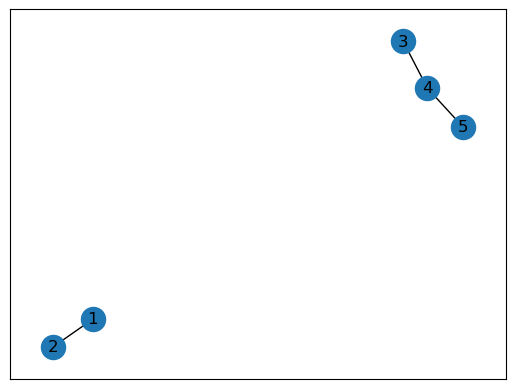

In [19]:
nx.draw_networkx(G)
print(nx.density(G))

0.3333333333333333


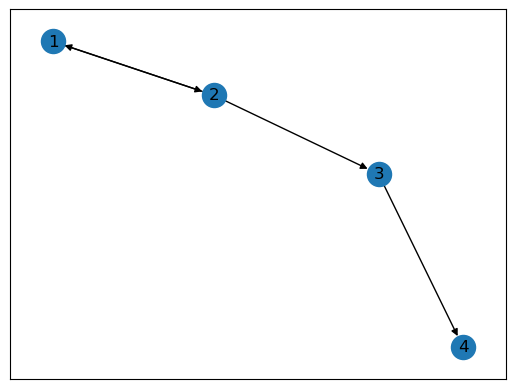

In [20]:
nx.draw_networkx(D)
print(nx.density(D))

1.0


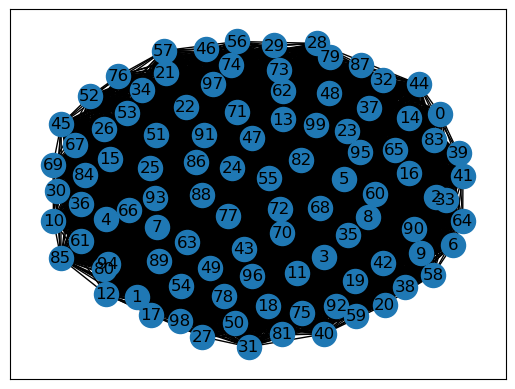

In [21]:
CG = nx.complete_graph(100)
nx.draw_networkx(CG)
print(nx.density(CG))

### 1.5 연결선 수

각 노드에 연결된 링크 수: [(1, 1), (2, 1), (3, 1), (4, 2), (5, 1)]
2와 연결된 링크 수: 1


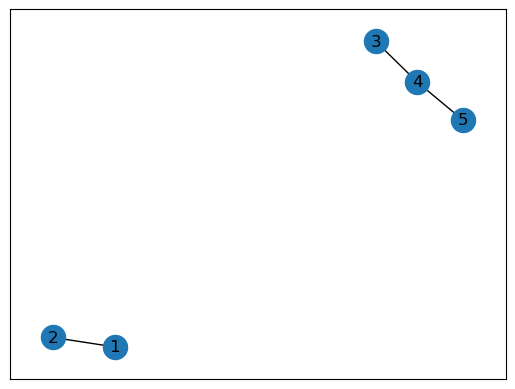

In [29]:
print('각 노드에 연결된 링크 수:', G.degree())
print('2와 연결된 링크 수:', G.degree(2))
nx.draw_networkx(G)

2로 들어오는 링크 수: 1
2에서 나가는 링크 수: 2
2에 연결된 링크 수: 3


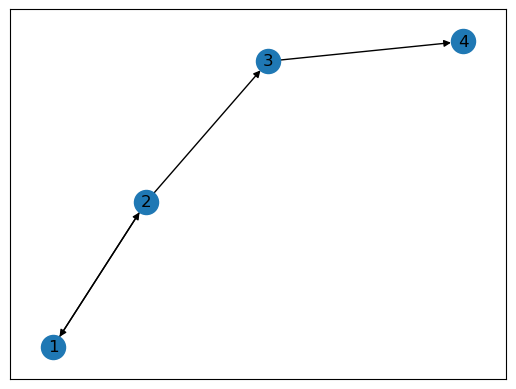

In [32]:
print('2로 들어오는 링크 수:', D.in_degree(2))
print('2에서 나가는 링크 수:', D.out_degree(2))
print('2에 연결된 링크 수:', D.degree(2))
nx.draw_networkx(D)

### 1.7 가중치 네트워크

링크의 가중치 속성은 각 링크의 가중치를 나타내는 각기 다른 너비의 선으로 표시된다.  
(가중치가 0 = 링크가 없음)  
노드의 가중치 연결선 수 또는 연결강도를 링크 가중치의 합으로 정의할 수 있다.  
방향성 가중치 네트워크에서 들어오는 연결강도와 나가는 연결강도를 정의할 수 있다.  
무방향 그래프와 방향 그래프 모두 링크에 가중치 속성을 부여할 수 있다.  
가중치 링크를 추가할 때 각 링크는 연속된 세 수로 지정되며 세 번째 요소가 가중치다.  

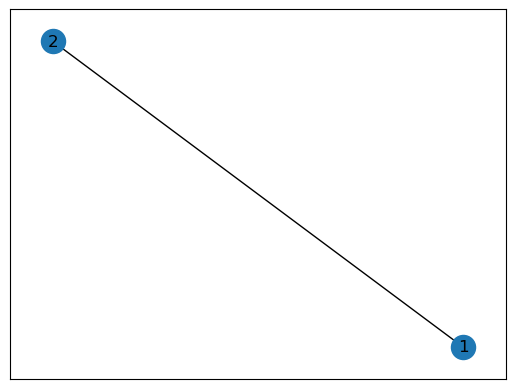

In [33]:
W = nx.Graph()
W.add_edge(1, 2, weight=6)
nx.draw_networkx(W)

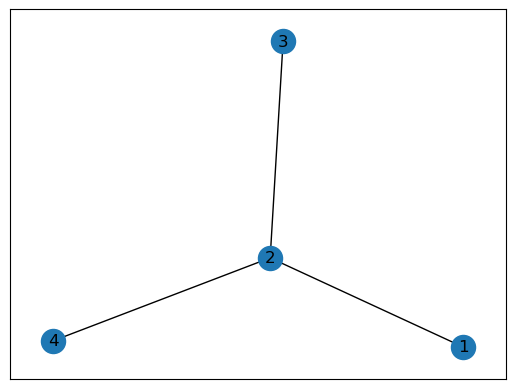

In [34]:
W.add_weighted_edges_from([(2, 3, 3), (2, 4, 5)])
nx.draw_networkx(W)

큰 가중치를 갖는 링크를 출력해야 하는 경우,  
관련 가중치 데이터가 있는 링크 리스트를 가져올 수 있다.

In [35]:
for i, j, w in W.edges(data='weight'):
  if w > 3:
    print(i, j, w)

1 2 6
2 4 5


In [36]:
# 노드의 연결강도
W.degree(2, weight='weight')

14

### 1.9 네트워크 표현법


**인접행렬**

행렬요소가 그 행과 열 인덱스에 해당하는 두 노드 사이의 링크를 나타내는 N*N행렬  
노드 i와 j가 인접해 있으면 1, 아니면 0  
가중치 네트웤의 경우 행렬 요소는 링크 가중치에 해당하는 모든 값을 가질 수 있다.

In [37]:
GE = nx.adjacency_matrix(G)
print(GE)

  (0, 1)	1
  (1, 0)	1
  (2, 3)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1


C:\Users\nsun5\AppData\Local\Temp\ipykernel_26328\2112479932.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  GE = nx.adjacency_matrix(G)


In [38]:
DE = nx.adjacency_matrix(D)
print(DE)

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 3)	1


C:\Users\nsun5\AppData\Local\Temp\ipykernel_26328\1925171268.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  DE = nx.adjacency_matrix(D)


In [39]:
WE = nx.adjacency_matrix(W)
print(WE)

  (0, 1)	6
  (1, 0)	6
  (1, 2)	3
  (1, 3)	5
  (2, 1)	3
  (3, 1)	5


C:\Users\nsun5\AppData\Local\Temp\ipykernel_26328\3910816008.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  WE = nx.adjacency_matrix(W)


**구조 인접 리스트**

각 노드의 이웃 목록을 저정하는 데이터  
크기가 크며 성긴 네트워크에서 좀 더 압축적인 네트워크를 표현  
인접 리스트 => 존재하지 않는 링크는 무시, 인접 행렬에서 0이 아닌 값인 기존 링크 표시하기에  
성긴 네트워크를 효과적으로 나타낸다.

In [40]:
for n,neighbors in G.adjacency():
  for number, link_attributes in neighbors.items():
    print(n , number)

1 2
2 1
3 4
4 3
4 5
5 4


In [41]:
for n,neighbors in D.adjacency():
  for number, link_attributes in neighbors.items():
    print(n, number)

1 2
2 1
2 3
3 4


In [43]:
nx.write_edgelist(G, 'edges/file.edges')
G2 = nx.read_edgelist('edges/file.edges')
print(G2)

nx.write_weighted_edgelist(W, 'edges/wf.edges')
with open('edges/wf.edges') as f:
  for line in f:
    print(line)

W2 = nx.read_weighted_edgelist('edges/wf.edges')
nx.write_edgelist(D,'edges/Dfile.edges')

Graph with 5 nodes and 3 edges
1 2 6

2 3 3

2 4 5



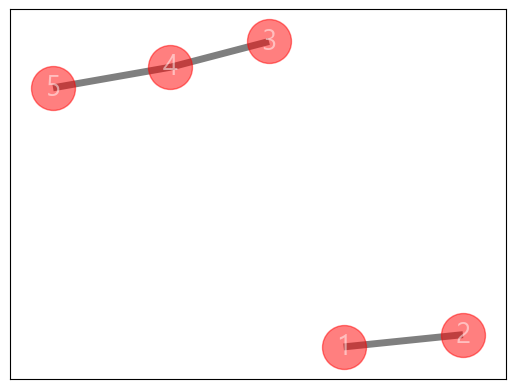

In [50]:
nx.draw_networkx(G,
        with_labels=True, # default: True
        font_weight='book',
        font_family='Malgun Gothic',
        font_size=20,
        font_color='white',
        node_size=1000,
        node_color='red',
        node_shape='o', # o, *, ^, .
        alpha=0.5,
        edge_color='black',
        width=5)

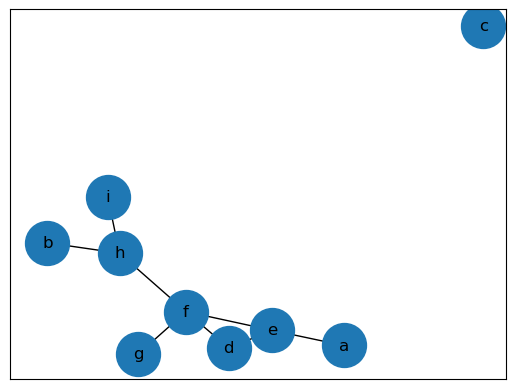

In [51]:
G = nx.Graph()
G.add_node('c')
G.add_edges_from([('a', 'e'),
                  ('b', 'h'),
                  ('d', 'e'),('d', 'f'),
                  ('e', 'f'),
                  ('f', 'g'),('f', 'h'),
                  ('h', 'i')])

nx.draw_networkx(G, node_size=1000)

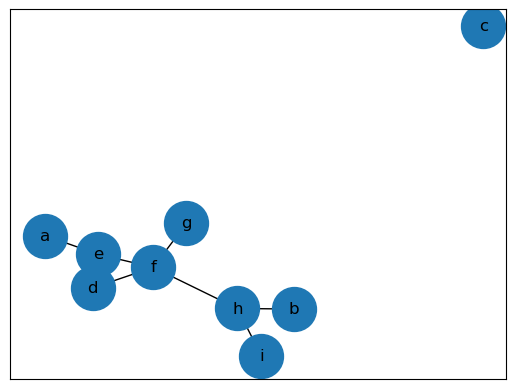

In [52]:
W = nx.Graph()
W.add_node('c')
W.add_edges_from([('f', 'g'),('h', 'i')])
W.add_weighted_edges_from([('a', 'e', 2),
                  ('b', 'h', 2),
                  ('d', 'e', 1),('d', 'f', 1),
                  ('e', 'f', 3),
                  ('f', 'h', 1) ])

nx.draw_networkx(W, node_size=1000)

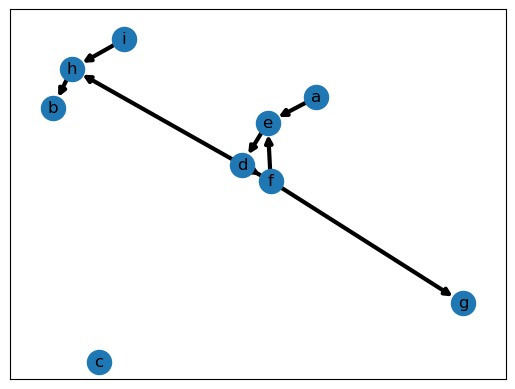

In [54]:
D = nx.DiGraph()
D.add_node('c')
D.add_edges_from([('a', 'e'),
                  ('d', 'f'),
                  ('e', 'd'),
                  ('f', 'e'),('f', 'g'),('f', 'h'),
                  ('h', 'b'),
                  ('i', 'h')])

nx.draw_networkx(D, width=3)

### 2.1 노드 간의 유사성

- 동류성: 연결된 노드들은 종종 비슷한 성질을 갖는 경향
- 동종선호: 비슷하다면 서로 연결될 가능성이 높은 것 (비슷한 사람=>친구)
- 사회적 영향: 시간이 흐름에 따라 친구들이 비슷해지는 것

동종선호의 어두운 면
- 메아리 방: 같은 의견을 가진 사람에 둘러싸일 때, 나와 다른 의견보다 우리 생각을 더욱 강화하는 정보와 의견만을 접하게 됨

### 동류성 계산

범주형 속성  
```assort_a = nx.attribute_assortativity_coefficient(G, category)```  

연속형 속성  
```assort_n = nx.numeric_assortativity_coefficient(G, quantity)```

### 네트워크의 연결선 수 동류성 측정

- 연결선 수 동류성: 연결선 수에 기반한 동류성  
    연결선 수가 큰 노드들이 다른 연결선 수가 큰 노드와 자주 연결되고 연결선 수가 적은 노드들이 다른 연결선 수가 적은 노드와 자주 연결될 때 나타난다.  
    이웃하는 노드의 연결선 수 사이의 상관관계 측정에 기반하여 연결선 수 동류성 측정

두 변수 중 한 변수의 큰 값이 다른 변수의 큰(작은) 값에 대응하는 경향이 있을 때,  
두변수는 양(음)의 상관관계를 갖는다.

- 피어슨 상관계수: [-1, 1]의 값을 가지며 0은 상관관계가 없음을 의미함.

In [55]:
r = nx.degree_assortativity_coefficient(G)
print(r)

-0.4177215189873418


**노드 i의 이웃의 평균 연결선 수 측정**  
계수가 양수: 연결선 수가 큰 노드들은 연결선 수가 큰노드들과 연결되는 경향이 있으며 네트워크가 동류적임.  
계수가 음수: 네트워크는 이류적이라고 한다.

In [56]:
import scipy.stats
knn_dict = nx.k_nearest_neighbors(G)
k, knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r, p_value)

0.39113306511578083 0.5150004391018035


C:\Users\nsun5\AppData\Local\Temp\ipykernel_26328\1902574458.py:2: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn_dict = nx.k_nearest_neighbors(G)


In [57]:
print(r, p_value)

0.39113306511578083 0.5150004391018035


### 경로와 거리

원천 노드에서 출발해 링크를 가로질러 가며 목표노드에 도달할 수 있다면 네트워크에서 두 노드 사이에 경로가 있다고 한다.

- 경로 : 가로지른 링크의 배열
- 경로 길이 : 경로를 이루는 링크의 수
- 사이클 : 원천 노드와 목표 노드가 같은 특별한 경로

두 노드 사이에는 여러 개의 경로가 존재할 수 있으며 이들은 서로 다른 길이를 갖거나 같은 링크를 공유하지 않을 수 있다.

최단 경로 : 두 노드를 연결하며 최소 개수의 리크를 가로지르는 경로의 링크 수

최단 경로 길이 : 최단 경로의 길이

방향과 가중치가 모두 없는 네트워크에서 최단 경로는 경로가 가로지르는 링크의 수가 최소인 경로이며, 경로의 방향에 상관없이 같은 값을 갖는다.


평균 최단경로 길이(평균 경로 길이) : 네트워크의 모든 노드 쌍 사이의 최단경로의 길이 평균
네트워크의 지름 : 네트워크의 모든 노드 쌍 사이의 최단 경로 길이 중 최댓값

In [ ]:
# 경로 찾기
print(nx.has_path(G, 'a', 'c'))
print(nx.has_path(G, 'a', 'b'), end='\n\n')

# 최단 경로 찾기
print(nx.shortest_path(G, 'a', 'b'))
print(nx.shortest_path(W, 'a', 'b'))
print(nx.shortest_path(D, 'a', 'b'), end='\n\n')

# 경로 길이 찾기
print(nx.shortest_path_length(G, 'a', 'b'))
print(nx.shortest_path_length(W, 'a', 'b'))
print(nx.shortest_path_length(W, 'a', 'b', 'weight'))
print(nx.shortest_path_length(D, 'a', 'b'), end='\n\n')

# 노드의 모든 최단 경로
print(nx.shortest_path(G, 'a'))
print(nx.shortest_path(W, 'a'))
print(nx.shortest_path(D, 'a'))

# 그래프의 모든 최단경로 확인하기
print(nx.shortest_path(G))
print(nx.shortest_path(W))
print(nx.shortest_path(D))

In [62]:
# 최단 경로 길이의 평균
print(nx.average_shortest_path_length(G))

NetworkXError: Graph is not connected.

c 노드에 최단 경로가 없기 때문에 오류가 발생한다

c 노드를 제거한 후 실행가능하다

In [ ]:
#G.remove_node('c')
nx.average_shortest_path_length(G)
nx.draw_networkx(G)

### 2.3 연결상태와 덩어리
단절(disconnected): 네트워크가 연결되지 않음

단절된 네트워크는 둘 이상의 연결된 덩어리(connected component) 혹은 덩어리(component)로 이뤄져 있다.  
덩어리 내부의 한 쌍의 노드는 경로를 통해 연결되지만 다른 덩어리에 속하는 한 쌍의 노드를 연결하는 경로는 없다.  
가장 큰 연결된 덩어리를 거대 덩어리(giant component)라고 한다.

약하게 연결된 덩어리 : 방향 네트워크에서는 한 노드에서 다른 노드에 도달할 수 있는지를 결정할 때 링크 방향에 주의해야 하기 때문에 이상황이 복잡하며, 링크 방향을 무시하고 덩어리를 결정할 경우

강하게 연결된 덩어리 : 방향 네트워크에서 모든 노드 쌍 사이에 양방향으로 각각 최소 하나의 방향이 있는 경로가 있는 덩어리

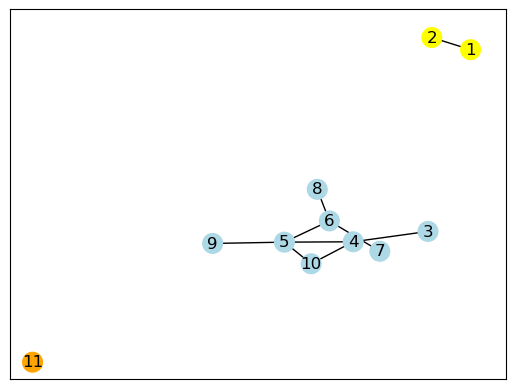

In [63]:
G2_4 = nx.Graph()
color = ['yellow','yellow','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','orange']

G2_4.add_nodes_from([(1,{'color':'yellow'}),
                     (2,{'color':'yellow'}),
                     (3,{'color':'lightblue'}),
                     (4,{'color':'lightblue'}),
                     (5,{'color':'lightblue'}),
                     (6,{'color':'lightblue'}),
                     (7,{'color':'lightblue'}),
                     (8,{'color':'lightblue'}),
                     (9,{'color':'lightblue'}),
                     (10,{'color':'lightblue'}),
                     (11,{'color':'orange'})])

G2_4.add_edges_from([(1,2),
                     (4,3),(4,5),(4,10),
                     (5,10),(5,6),(5,9),
                     (6,7),(6,8)])

nx.draw_networkx(G2_4, node_color=color,node_size=200)

In [64]:
nx.is_connected(G2_4)

False

In [65]:
comps = sorted(nx.connected_components(G2_4), key=len, reverse=True)
nodes_in_giant_comp = comps[0]
GC = nx.subgraph(G2_4, nodes_in_giant_comp)
nx.is_connected(GC)

True

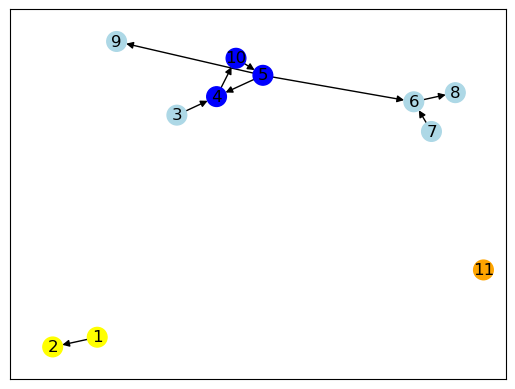

In [66]:
D2_4 = nx.DiGraph()
color = ['yellow','yellow','lightblue','blue','blue','lightblue','lightblue','lightblue','lightblue','blue','orange']
D2_4.add_nodes_from([(1,{'color':'yellow'}),
                     (2,{'color':'yellow'}),
                     (3,{'color':'lightblue'}),
                     (4,{'color':'blue'}),
                     (5,{'color':'blue'}),
                     (6,{'color':'lightblue'}),
                     (7,{'color':'lightblue'}),
                     (8,{'color':'lightblue'}),
                     (9,{'color':'lightblue'}),
                     (10,{'color':'blue'}),
                     (11,{'color':'orange'})])

D2_4.add_edges_from([(1,2),(3,4),(4,10),(10,5),
                     (5,4),(5,9),(5,6),
                     (6,8),(7,6)])

nx.draw_networkx(D2_4, node_color=color,node_size=200)


In [67]:
nx.is_strongly_connected(D2_4)

False

In [68]:
nx.is_weakly_connected(D2_4)

False

In [69]:
list(nx.weakly_connected_components(D2_4))

[{1, 2}, {3, 4, 5, 6, 7, 8, 9, 10}, {11}]

In [70]:
list(nx.strongly_connected_components(D2_4))

[{2}, {1}, {9}, {8}, {6}, {4, 5, 10}, {3}, {7}, {11}]

네트워크 거리 측정방법

1. 거대 덩이러에 속한 노드만 고려한다.
2. 모든 덩어리를 다 고려하되, 같은 덩어리에 속하는 노드쌍으로만 평균을 구하는 것

단절된 네트워크의 지름을 구하기 위해 가 덩어리의 지름을 구하고 최댓값을 취할 수 있음.

### 2.7 여섯 단계 분리

세상의 어떤 사람이든 여섯 사람만 건너가면 모두를 알 수 있음.

평균 경로 길이가 네트워크 크기에 따라 느리게 커지는 것을 수학적으로 평균 경로 길이가 네트워크 크기에 대해 로그적으로 증가하는 것을 나타 낼 수 있음.

네트워크에 수천만의 노드가 있더라도 평균 경로 길이는 여전히 한 자리 수이다.

### 2.8 친구의 친구

- 삼각구조 : 친구의 친구는 내 친구일 확률이 높음
    삼각구조 형성 메카니즘으로 페이스북에서 알 수도 있는사람을 추천함.
- 노드의 뭉침계수 : 노드의 이웃 노드들의 쌍 중에서 서로 연결된 쌍의 비율
    뭉침계수는 무방향 네트워크에만 적용된다.
- 뭉침 계수 = 형셩된 삼각 구조 / 형성될 수 있는 삼각 구조

In [71]:
# 삼각구조의 개수 구하기
nx.triangles(G)

{'c': 0, 'a': 0, 'e': 1, 'b': 0, 'h': 0, 'd': 1, 'f': 1, 'g': 0, 'i': 0}

In [72]:
# 노드의 뭉침 계수 구하기
nx.clustering(G,'d')

1.0

In [73]:
nx.clustering(G)

{'c': 0,
 'a': 0,
 'e': 0.3333333333333333,
 'b': 0,
 'h': 0,
 'd': 1.0,
 'f': 0.16666666666666666,
 'g': 0,
 'i': 0}

In [74]:
# 네트워크의 평균 뭉침 계수 구하기
nx.average_clustering(G)

0.16666666666666666

## 3. 허브

- 불균일성 : 예를 들어 일부 노드에는 많은 이웃이 있지만 대부분의 노드에는 이웃이 별로 없다.
- 중요도 : 노드 또는 링크의 중심도를 통해 추정할 수 있음
- 허브 : 그 주변으로 다른 것들이 돌거나 그곳으로부터 사방으로 퍼져나가는 중심지

### 3.1 중심성 측도(중심도)
#### 3.1.1 연결선 수

네트워크의 평균 연결선 수는 노드가 평균적으로 얼마나 연결되어 있는지를 나타낸다.  
예를 들어 소셜네트워크에서 연결선 수가 많은 노드는 인맥이 넓은 사람들이다.  
어떤 의미에서 이런 노드는 중요해 보이므로 연결선 수는 소셜 네트워크의 중심도를 나타내는 매우 자연스러운 양이다.

#### 3.1.2 근접도
노드가 다른 노드와 얼마나 '가까운지'를 결정하는 것  
한 노드에서 모든 노드까지의 거리를 더해서 정한다.  
거리가 평균적으로 짧으면 그합한 양이 적을 것이고 노드의 중심도가 높다고 할 수 있다.  
근접 중심도 : 한 노드에서 다른 모든 노드까지의 거리 합의 역수

In [75]:
nx.closeness_centrality(G)

{'c': 0.0,
 'a': 0.3223684210526316,
 'e': 0.47115384615384615,
 'b': 0.3402777777777778,
 'h': 0.5104166666666667,
 'd': 0.4375,
 'f': 0.6124999999999999,
 'g': 0.3828125,
 'i': 0.3402777777777778}

#### 3.1.3 사이 중심도

확산 과정을 기반으로 하여 제안됨.  
노드가 중심에 가까울수록 이 과정에 더 자주 개입하게 되기 때문이다.

네트워크의 두 노드 사이에 길이가 같은 최단 경로가 둘 이상 있을 수 있다.  
그 때 노드 i를 포함하는 경로의 합

**노드 3에 대한 사이 중심도**

노드 1에서 최단 경로 2 : 0 , 4 : 0 , 5 : 1  
노드 2에서 최단 경로 1 : 0 , 4 : 0.5 , 5 : 1  
노드 4에서 최단 경로 1 : 0 , 2 : 0.5 , 5 : 1  
노드 5에서 최단 경로 1 : 1 , 2 : 1, 4 : 1  

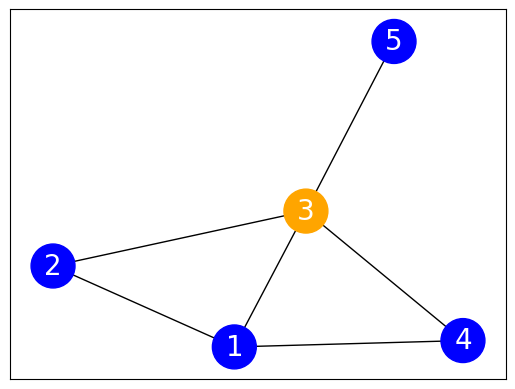

In [76]:
G3_1 = nx.Graph()
G3_1.add_nodes_from([1,2,3,4,5])
G3_1.add_edges_from([(1,2), (1,3), (1,4),
                     (2,3),
                     (3,4),(3,5)])
nx.draw_networkx(G3_1, node_color=['blue','blue','orange','blue','blue'], 
        font_color='white', font_size=20, node_size=1000)

어떤 노드가 네트워크에서 일어나는 통신에 있어 중요한 본부와 같이 특별한 위치에 있다면 높은 사이 중심도를 갖게 된다.

일반적으로는 노드의 연결선 수와 사이 중심도에는 산관관계가 있어서 잘 연결된 노드가 대체로 사이 중심도가 높고 사이중심도가 높은 노드가 대체로 잘연결되어 있으나

예외도 많다 예로 다리가 하나라면 반드시 그곳을 지나야 한다.

사이 중심도는 네트워크의 크기에 따라 달라진다.  
다양한 네트워크들 간의 노드 또는 링크의 사이중심도를 비교하려면, 사이 중심도 값을 정규화해야 한다.

In [77]:
# 정규화 된 사이 중심도 계산
nx.betweenness_centrality(G3_1)

{1: 0.08333333333333333, 2: 0.0, 3: 0.5833333333333333, 4: 0.0, 5: 0.0}

In [78]:
nx.edge_betweenness_centrality(G3_1)

{(1, 2): 0.15000000000000002,
 (1, 3): 0.2,
 (1, 4): 0.15000000000000002,
 (2, 3): 0.25,
 (3, 4): 0.25,
 (3, 5): 0.4}

### 3.3친구 역설

이웃에서 이웃의 이웃으로 이동하면 허브를 만날 확률이 높아진다.

각 단계별로 따라 갈 수 있는 링크의 수가 늘어낫 그중 하나가 허브에 연결될 가능성이 높아지기 때문이다.  
예시) 친구가 가장 많은 사람을 찾을 확률


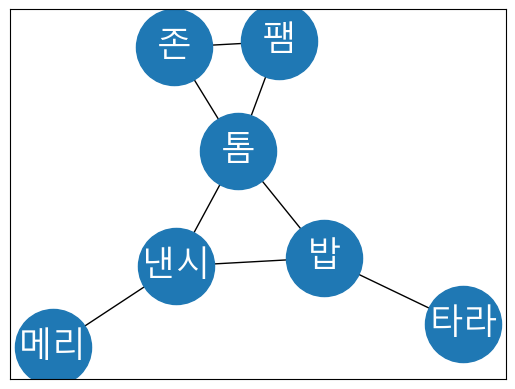

In [79]:
import networkx as nx
p = ['톰','메리','낸시','타라','밥','존','팸']

G3_5 = nx.Graph()
G3_5.add_edges_from([('톰','낸시'),('톰','밥'),('톰','존'),('톰','팸'),
                     ('낸시','메리'),('낸시','밥'),
                     ('밥','타라'),
                     ('존','팸')])

nx.draw_networkx(G3_5, font_family='Malgun Gothic',
        font_size=25, font_color='white', node_size=3000)

무작위를 선정해 톰을 찾을 확률 1/7  
무작위 선정 그 인물의 친구로 톰을 찾을 확률 = 5/21

### 3.6 코어분해
각 노드의 연결선 수를 활용해 네트워크를 껍질이라고 하는 별개의 부분으로 분해할 수 있는데, 여기서 껍질은 네트워크의 코어-주변부 구조에서 위치에 따라 결정된다

연결선 수가 적은 바깥쪽 껍질이 주변부에 해당한다. 이들을 제거하거나 벗기면, 더 조밀한 내부 서브네트워크인 코어가 남는다

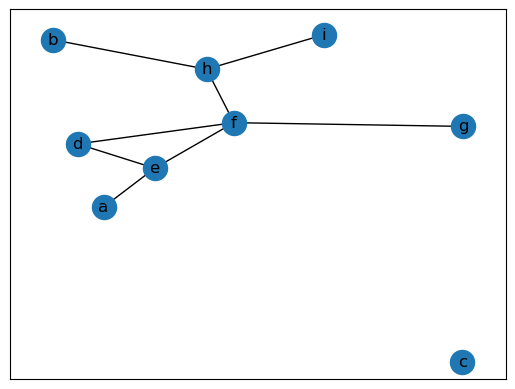

In [80]:
nx.draw_networkx(G)

In [81]:
# 각 노드에 해당하는 코어 숫자로 이뤄진 딕셔너리 반환
nx.core_number(G)

{'c': 0, 'a': 1, 'e': 2, 'b': 1, 'h': 1, 'd': 2, 'f': 2, 'g': 1, 'i': 1}

In [82]:
# k껍질에 있는 노드들로 이뤄진 서브네트워크
G_sub1 = nx.k_shell(G, 2)

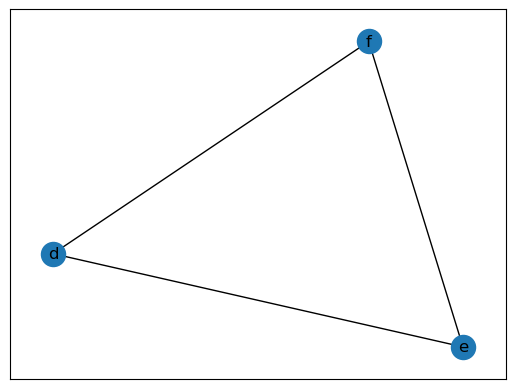

In [83]:
nx.draw_networkx(G_sub1)

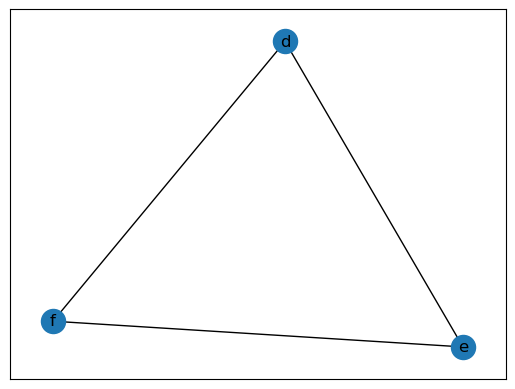

In [85]:
# k 코어에 있는 노드들로 이뤄진 서브네트워크
G_sub2 = nx.k_core(G,2)
nx.draw_networkx(G_sub2)

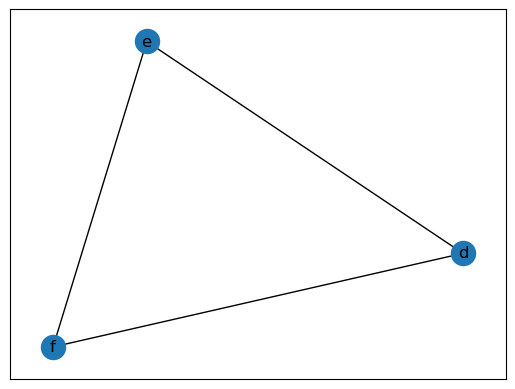

In [87]:
# 가장 안쪽에 있는 코어인 서브네트워크
G_sub3 = nx.k_core(G)
nx.draw_networkx(G_sub3)

In [88]:
# 셀프 루프 제거
G.remove_edges_from(nx.selfloop_edges(G))

## 4.방향성과 가중치
### 4.3 페이지랭크

각 노드의 명성 또는 중요도를 파악하는 것을 목표로 하는 중심도를 계산하는 알고리즘 또는 절차이며,   일반적으로 방향성 네트워크에서 사용된다.

netxorkx는 방향성 네트워크에서 페이지랭크 알고리즘을 실행하는 노드 페이지랭크값이 들어 있는  
딕셔너리를 반환하는 기능을 제공한다.

In [89]:
PR_dict = nx.pagerank(G3_5)
PR_dict

{'톰': 0.23178138704696996,
 '낸시': 0.1868225500810409,
 '밥': 0.1868225500810409,
 '존': 0.12292481226826371,
 '팸': 0.12292481226826371,
 '메리': 0.07436194412721038,
 '타라': 0.07436194412721038}